In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D,Flatten, Dense, Dropout

In [ ]:
df = pd.read_csv("/content/data_file.csv")
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [ ]:
df.isnull().sum()

FileName              0
md5Hash               0
Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64

In [ ]:
df.shape

(62485, 18)

In [ ]:
df.describe()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,62485.000000,6.248500e+04,6.248500e+04,62485.000000,62485.000000,6.248500e+04,6.248500e+04,6.248500e+04,62485.000000,62485.000000,62485.000000,6.248500e+04,62485.000000,6.248500e+04,62485.000000,62485.000000
mean,6756.472657,2.587048e+04,1.541611e+05,58.785997,5.417524,8.953186e+05,4.094623e+05,1.466311e+05,9.782604,6.613171,4.751172,8.759830e+05,12966.031400,1.844664e+05,0.018004,0.433992
std,13345.499919,6.461396e+06,1.903142e+06,1114.068244,2.543697,3.779527e+07,2.851820e+07,1.124630e+06,9.047157,16.976465,2.138584,6.288189e+05,15762.725511,1.732625e+07,0.132968,0.495628
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,332.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000e+00,0.000000e+00,4.096000e+03,6.000000,0.000000,3.000000,2.621440e+05,0.000000,1.080000e+03,0.000000,0.000000
50%,332.000000,0.000000e+00,0.000000e+00,0.000000,5.000000,0.000000e+00,0.000000e+00,8.520000e+03,9.000000,0.000000,5.000000,1.048576e+06,320.000000,2.496000e+03,0.000000,0.000000
75%,332.000000,2.800000e+01,1.283200e+04,6.000000,6.000000,2.875200e+04,1.040000e+02,6.553600e+04,11.000000,10.000000,6.000000,1.048576e+06,32768.000000,2.350400e+04,0.000000,1.000000
max,43620.000000,1.615155e+09,2.852127e+08,63325.000000,260.000000,2.147484e+09,2.415919e+09,6.615450e+07,255.000000,255.000000,33.000000,1.677722e+07,58632.000000,4.294942e+09,1.000000,1.000000


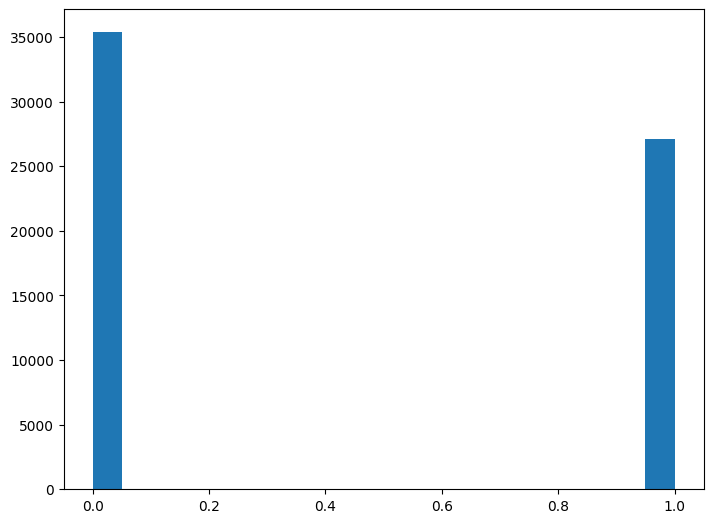

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(df['Benign'],20)
plt.show()

In [ ]:
y=df['Benign']
df=df.drop(['Benign'],axis=1)

In [ ]:
df = df.drop('FileName', axis=1)
df = df.drop('md5Hash', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.3, random_state=42)

**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)

randomModel=clf.fit(X_train, y_train)

In [ ]:
train_pred=randomModel.predict(X_train)

accuracy_score(y_train,train_pred)

0.9097830311621208

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Confusion Matrix
conf_matrix = confusion_matrix(y_train,train_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[22910  1779]
 [ 2167 16883]]


In [ ]:
# Classification Report
class_report = classification_report(y_train,train_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     24689
           1       0.90      0.89      0.90     19050

    accuracy                           0.91     43739
   macro avg       0.91      0.91      0.91     43739
weighted avg       0.91      0.91      0.91     43739



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Predict the test set results
y_pred = knn.predict(X_test)

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.9764216366158114
F1 Score: 0.9724335786453786


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10508   170]
 [  272  7796]]


In [ ]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     10678
           1       0.98      0.97      0.97      8068

    accuracy                           0.98     18746
   macro avg       0.98      0.98      0.98     18746
weighted avg       0.98      0.98      0.98     18746



**CNN**

In [ ]:
data = pd.read_csv("data_file.csv")

In [ ]:
data = data.drop(columns=["FileName", "md5Hash"])

In [ ]:
X = data.drop(columns=["Benign"])
y = data["Benign"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/10
616/616 [==============================] - 5s 6ms/step - loss: 0.2120 - accuracy: 0.9340 - val_loss: 0.1302 - val_accuracy: 0.9579
Epoch 2/10
616/616 [==============================] - 3s 5ms/step - loss: 0.1186 - accuracy: 0.9677 - val_loss: 0.0929 - val_accuracy: 0.9737
Epoch 3/10
616/616 [==============================] - 4s 6ms/step - loss: 0.0983 - accuracy: 0.9740 - val_loss: 0.0845 - val_accuracy: 0.9762
Epoch 4/10
616/616 [==============================] - 4s 6ms/step - loss: 0.0889 - accuracy: 0.9757 - val_loss: 0.0914 - val_accuracy: 0.9765
Epoch 5/10
616/616 [==============================] - 3s 4ms/step - loss: 0.0832 - accuracy: 0.9768 - val_loss: 0.0739 - val_accuracy: 0.9792
Epoch 6/10
616/616 [==============================] - 3s 5ms/step - loss: 0.0820 - accuracy: 0.9774 - val_loss: 0.0703 - val_accuracy: 0.9810
Epoch 7/10
616/616 [==============================] - 3s 4ms/step - loss: 0.0772 - accuracy: 0.9783 - val_loss: 0.0685 - val_accuracy: 0.9810
Epoch 

In [ ]:
y_pred_prob = model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

586/586 [==============================] - 1s 2ms/step
Test Accuracy: 0.9815427291155446


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10489   189]
 [  157  7911]]


In [ ]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10678
           1       0.98      0.98      0.98      8068

    accuracy                           0.98     18746
   macro avg       0.98      0.98      0.98     18746
weighted avg       0.98      0.98      0.98     18746



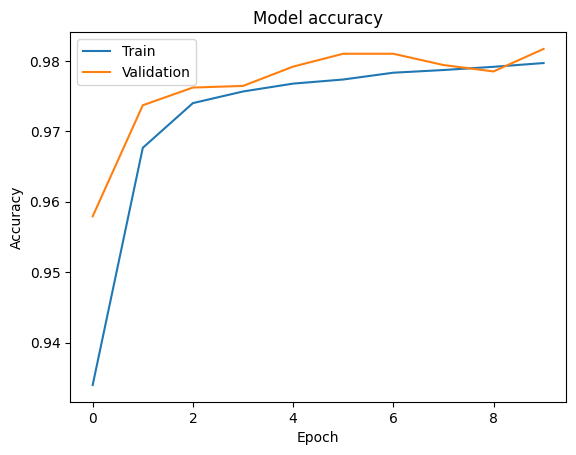

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

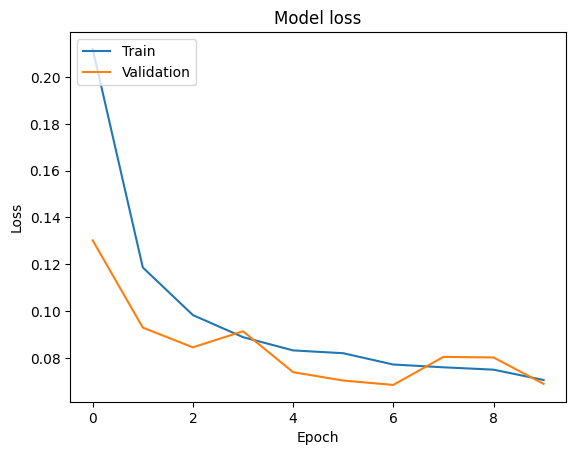

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()